In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/songanisaikiran/Downloads/cleaned_ITEMS_combined.csv')


In [2]:
# Filter the dataset based on the specified cashiers
filtered_data = data[data["Cashier Name"].isin([
    "Ann Carshult", "Dawn Pell", "Jamie Cosgrove", "Lydia Gardner", 
    "Richard Stanaro", "pearmundcellars Manager", "Savannah Roda"
])]

# Filter the dataset based on the specified wine club wines
wine_club_wines_data = filtered_data[filtered_data["Line Item"].isin([
    'Sunshine', 'Chardonnay', 'Cabernet Franc', 'Alento', 
    'Rose', 'Petit Manseng', 'Ameritage', 'Petit Verdot', 
    'Viognier', 'Ameritage Reserve',
])]



In [3]:
# Group the data by month and sum the quantities
monthly_sales = wine_club_wines_data.groupby('Month')['Quantity'].sum()

# Convert month numbers to month names for display
def convert_month_to_name(month_series):
    return month_series.rename(index={
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    })


# Define wine club pick up months
pick_up_months = [2, 5, 8, 11]

#Convert quantities to string and append "bottles"
formatted_monthly_sales = convert_month_to_name(monthly_sales).map(lambda x: f"{x} bottles")

# Display sales by month with "bottles" appended
print(formatted_monthly_sales)

Month
January       506 bottles
February      814 bottles
March         664 bottles
April        1036 bottles
May           927 bottles
June          654 bottles
July          838 bottles
August        903 bottles
September     756 bottles
October       790 bottles
November      782 bottles
December      643 bottles
Name: Quantity, dtype: object


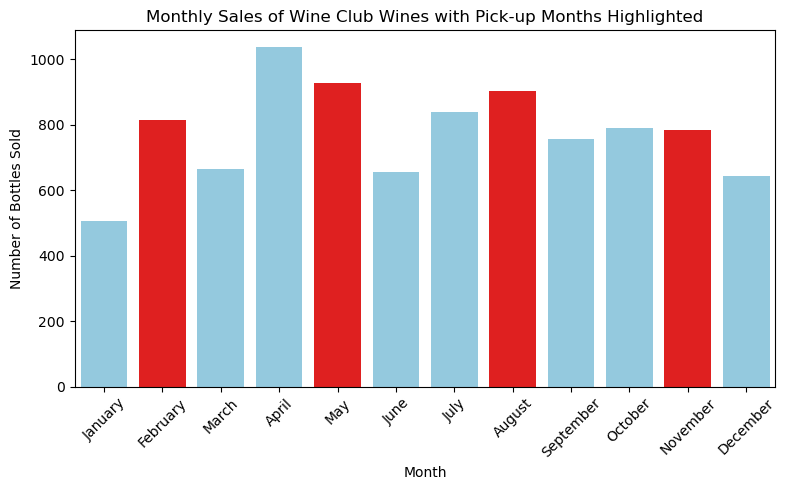

In [11]:
# Highlight the wine club pick-up months
colors = ['red' if month in pick_up_months else 'skyblue' for month in monthly_sales.index]

# Plot the data with highlighted pick-up months
plt.figure(figsize=(8, 5))
sns.barplot(x=month_names, y=monthly_sales.values, palette=colors)
plt.title("Monthly Sales of Wine Club Wines with Pick-up Months Highlighted")
plt.ylabel("Number of Bottles Sold")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Calculate the average monthly sales during pick up months and non-pick up months
average_sales_pick_up_months = monthly_sales[pick_up_months].mean()
average_sales_non_pick_up_months = monthly_sales[~monthly_sales.index.isin(pick_up_months)].mean()

print(f"Average sales during pick up months: {average_sales_pick_up_months:.2f} bottles")
print(f"Average sales during non-pick up months: {average_sales_non_pick_up_months:.2f} bottles")


Average sales during pick up months: 856.50 bottles
Average sales during non-pick up months: 735.88 bottles


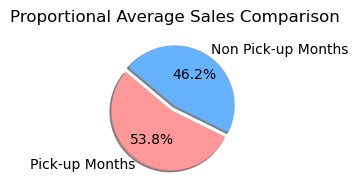

In [13]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ["Pick-up Months", "Non Pick-up Months"]
average_sales_values = [average_sales_pick_up_months, average_sales_non_pick_up_months]

# Create the pie chart for average sales comparison
plt.figure(figsize=(4, 2))
plt.pie(average_sales_values, labels=categories, colors=["#FF9999", "#66B2FF"], 
        autopct='%1.1f%%', startangle=140, explode=(0.1, 0), shadow=True)
plt.title("Proportional Average Sales Comparison")
plt.tight_layout()
plt.show()


In [14]:
# Extract sales values
feb_pick_up_sales = monthly_sales[2]
mar_sales = monthly_sales[3]
apr_sales = monthly_sales[4]
may_pick_up_sales = monthly_sales[5]
jun_sales = monthly_sales[6]
jul_sales = monthly_sales[7]
aug_pick_up_sales = monthly_sales[8]
sep_sales = monthly_sales[9]
oct_sales = monthly_sales[10]
nov_pick_up_sales = monthly_sales[11]
dec_sales = monthly_sales[12]
jan_sales = monthly_sales[1]

# Compute averages
feb_avg = (mar_sales + apr_sales) / 2
may_avg = (jun_sales + jul_sales) / 2
aug_avg = (sep_sales + oct_sales) / 2
nov_avg = (dec_sales + jan_sales) / 2

# Construct the output strings
feb_str = f"February: PickUpSales: {feb_pick_up_sales}, Avg of March and April: {feb_avg:.2f} bottles"
may_str = f"May: PickUpSales: {may_pick_up_sales}, Avg of June and July: {may_avg:.2f} bottles"
aug_str = f"August: PickUpSales: {aug_pick_up_sales}, Avg of September and October: {aug_avg:.2f} bottles"
nov_str = f"November: PickUpSales: {nov_pick_up_sales}, Avg of December and January: {nov_avg:.2f} bottles"

print(feb_str)
print(may_str)
print(aug_str)
print(nov_str)


February: PickUpSales: 814, Avg of March and April: 850.00 bottles
May: PickUpSales: 927, Avg of June and July: 746.00 bottles
August: PickUpSales: 903, Avg of September and October: 773.00 bottles
November: PickUpSales: 782, Avg of December and January: 574.50 bottles


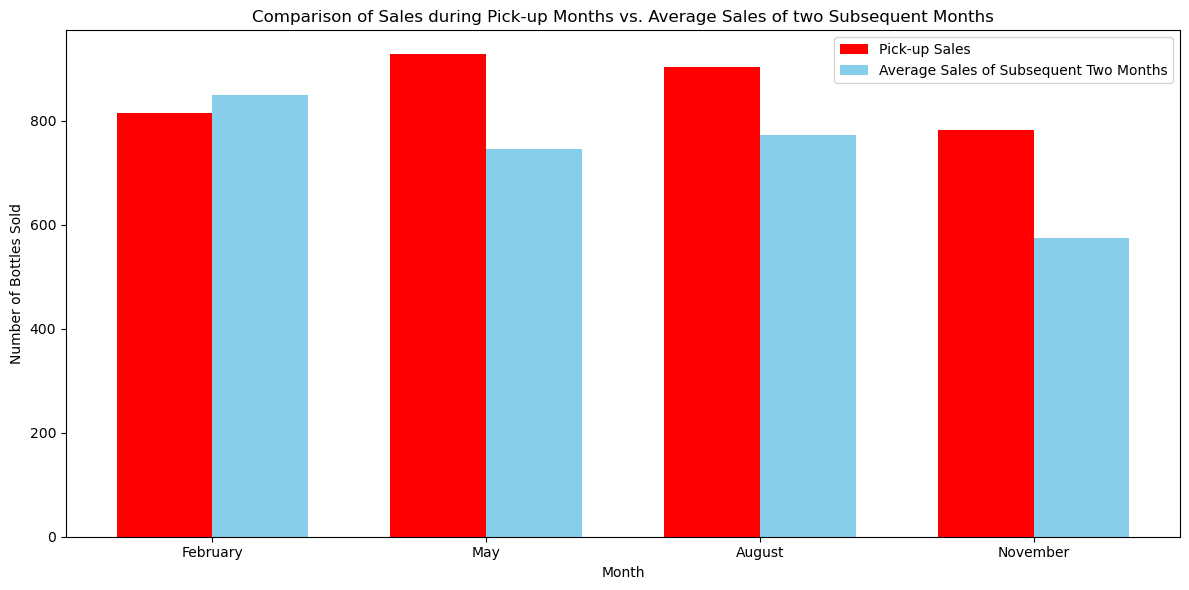

In [15]:
import matplotlib.pyplot as plt

# Data preparation for visualization
months = ['February', 'May', 'August', 'November']
pick_up_sales = [feb_pick_up_sales, may_pick_up_sales, aug_pick_up_sales, nov_pick_up_sales]
average_sales = [feb_avg, may_avg, aug_avg, nov_avg]

# Create the grouped bar plot
bar_width = 0.35  # width of the bars
index = range(len(months))  # the label locations

# Plotting
plt.figure(figsize=(12, 6))

# Plot pick-up sales with red color
pick_up_bars = plt.bar(index, pick_up_sales, bar_width, label='Pick-up Sales', color='red')

# Plot average sales of subsequent two months with sky blue color
avg_sales_bars = plt.bar([i + bar_width for i in index], average_sales, bar_width, label='Average Sales of Subsequent Two Months', color='skyblue')

# Labeling and aesthetics
plt.xlabel('Month')
plt.ylabel('Number of Bottles Sold')
plt.title('Comparison of Sales during Pick-up Months vs. Average Sales of two Subsequent Months')
plt.xticks([i + bar_width / 2 for i in index], months)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
# Group the data by wine and month, then sum the quantities
wine_monthly_sales = wine_club_wines_data.groupby(['Line Item', 'Month'])['Quantity'].sum()

# Calculate the average sales for each wine during pick-up and non-pick-up months
pick_up_sales = wine_monthly_sales.loc(axis=0)[:, pick_up_months].mean(level=0)
non_pick_up_sales = wine_monthly_sales.loc(axis=0)[:, ~wine_monthly_sales.index.get_level_values('Month').isin(pick_up_months)].mean(level=0)

# Merge the two series into a DataFrame for comparison
wine_sales_comparison = pd.DataFrame({
    'PickUp_Months_Avg_Sales': pick_up_sales,
    'Non_PickUp_Months_Avg_Sales': non_pick_up_sales
}).sort_values(by='PickUp_Months_Avg_Sales', ascending=False)

# Format the columns to display the values as "x bottles"
wine_sales_comparison['PickUp_Months_Avg_Sales'] = wine_sales_comparison['PickUp_Months_Avg_Sales'].map(lambda x: f"{x:.2f} bottles")
wine_sales_comparison['Non_PickUp_Months_Avg_Sales'] = wine_sales_comparison['Non_PickUp_Months_Avg_Sales'].map(lambda x: f"{x:.2f} bottles")

print(wine_sales_comparison)


                  PickUp_Months_Avg_Sales Non_PickUp_Months_Avg_Sales
Line Item                                                            
Rose                       123.50 bottles               83.12 bottles
Chardonnay                 120.75 bottles               99.75 bottles
Sunshine                    97.50 bottles               73.38 bottles
Viognier                    94.00 bottles               88.62 bottles
Ameritage                   93.75 bottles               96.25 bottles
Petit Manseng               92.00 bottles               81.88 bottles
Cabernet Franc              77.50 bottles               67.00 bottles
Petit Verdot                69.25 bottles               87.12 bottles
Ameritage Reserve           59.75 bottles               61.50 bottles
Alento                      57.00 bottles               25.25 bottles


/var/folders/8h/kmz74hwn4150k_wnw4yr2gfr0000gn/T/ipykernel_84431/4020953666.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  pick_up_sales = wine_monthly_sales.loc(axis=0)[:, pick_up_months].mean(level=0)
/var/folders/8h/kmz74hwn4150k_wnw4yr2gfr0000gn/T/ipykernel_84431/4020953666.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  non_pick_up_sales = wine_monthly_sales.loc(axis=0)[:, ~wine_monthly_sales.index.get_level_values('Month').isin(pick_up_months)].mean(level=0)


In [17]:


# Filter the dataset based on the specified cashiers and wine club wines
filtered_data = data[data["Cashier Name"].isin([
    "Ann Carshult", "Dawn Pell", "Jamie Cosgrove", "Lydia Gardner", 
    "Richard Stanaro", "pearmundcellars Manager", "Savannah Roda"
])]
wine_club_wines_data = filtered_data[filtered_data["Line Item"].isin([
    'Sunshine', 'Chardonnay', 'Cabernet Franc', 'Alento', 
    'Rose', 'Petit Manseng', 'Ameritage', 'Petit Verdot', 
    'Viognier', 'Ameritage Reserve',
])]

# Group the data by wine and month, then sum the quantities
wine_monthly_sales = wine_club_wines_data.groupby(['Line Item', 'Month'])['Quantity'].sum()

# Define wine club pick up months
pick_up_months = [2, 5, 8, 11]

# Function to extract sales data for each wine for specific months
def extract_sales_data(wine_name, month):
    try:
        return wine_monthly_sales.loc[wine_name, month]
    except KeyError:
        return 0

# Function to calculate average sales for subsequent two months
def average_subsequent_sales(wine_name, month):
    subsequent_months = [(month + 1) % 12 or 12, (month + 2) % 12 or 12]
    sales_values = [extract_sales_data(wine_name, m) for m in subsequent_months]
    return sum(sales_values) / len(sales_values)

# Construct the table
table_data = []
for wine in wine_club_wines_data["Line Item"].unique():
    wine_data = [wine]
    for month in pick_up_months:
        wine_data.append(extract_sales_data(wine, month))
        wine_data.append(average_subsequent_sales(wine, month))
    table_data.append(wine_data)

# Create the DataFrame
columns = [
    "Wine Name", 
    "Sales in February", "Average Sales in March and April",
    "Sales in May", "Average Sales in June and July",
    "Sales in August", "Average Sales in September and October",
    "Sales in November", "Average Sales in December and January"
]
sales_table = pd.DataFrame(table_data, columns=columns)
print(sales_table)


           Wine Name  Sales in February  Average Sales in March and April  \
0               Rose                 94                              76.0   
1      Petit Manseng                 63                              93.0   
2         Chardonnay                109                             101.5   
3          Ameritage                110                              98.0   
4     Cabernet Franc                 58                              87.0   
5           Viognier                 68                              87.5   
6       Petit Verdot                 77                             113.0   
7           Sunshine                 78                              89.5   
8  Ameritage Reserve                 60                              71.0   
9             Alento                 97                              33.5   

   Sales in May  Average Sales in June and July  Sales in August  \
0           138                           147.0              209   
1           105 

# Effingham Manor

In [18]:
# Filter the dataset based on the specified cashiers
fil_data = data[data["Cashier Name"].isin([
    "Frank Reilly", "Julie Phalon", "Jamie Cosgrove", "Sylvia Blair", 
    "Victoria Buchheit", "effingham Manager"]
)]

In [19]:

# Filter the dataset based on the specified wine club wines
wine_club_wines_data_ef = fil_data[fil_data["Line Item"].isin([
    'Viognier', 'Merlot', 'Petit verdot', 'SNORT', 
    'Meritage', 'RESERVE', 'Celebration', 'Kings Ransom', 
    '2021 Cab Franc','Petit manseng','Tannat','Rose','Chardonnay'
])]

In [20]:

monthly_sales_ef = wine_club_wines_data_ef.groupby('Month')['Quantity'].sum()
# Convert month numbers to month names for display
def convert_month_to_name(month_series):
    return month_series.rename(index={
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    })

# Display sales by month
# print(convert_month_to_name(monthly_sales))


# Define wine club pick up months
pick_up_months_ef = [3,6, 9, 12]

#Convert quantities to string and append "bottles"
formatted_monthly_sales_ef = convert_month_to_name(monthly_sales_ef).map(lambda x: f"{x} bottles")

# Display sales by month with "bottles" appended
print(formatted_monthly_sales_ef)

Month
January       644 bottles
February      717 bottles
March        1143 bottles
April        1369 bottles
May          1031 bottles
June         1515 bottles
July         1002 bottles
August        877 bottles
September    1469 bottles
October      1004 bottles
November      762 bottles
December     1112 bottles
Name: Quantity, dtype: object


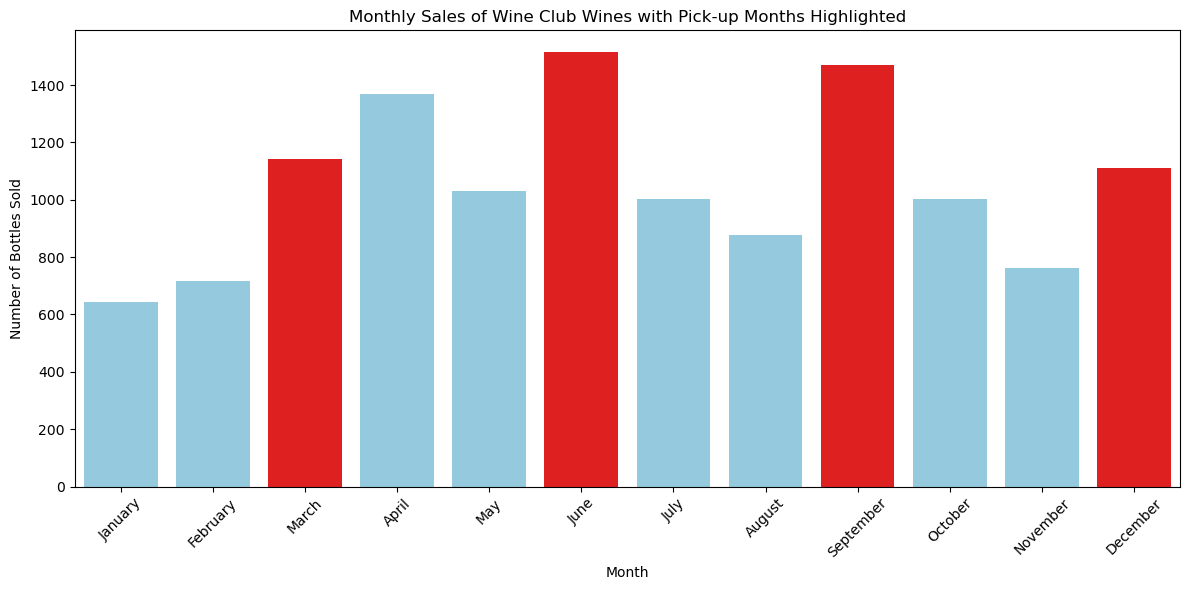

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a pandas Series 'monthly_sales_ef' with month numbers as the index
# and the values as the quantity sold. 

# Convert month numbers to month names for the visualization
month_names_ef = convert_month_to_name(monthly_sales_ef).index

# Define Effingham winery's wine club pick-up months as numbers
pick_up_months_ef = [3, 6, 9, 12]  # Example: March, June, September, December

# Highlight the wine club pick-up months
colors_ef = ['red' if month in pick_up_months_ef else 'skyblue' for month in monthly_sales_ef.index]

# Plot the data with highlighted pick-up months
plt.figure(figsize=(12, 6))
sns.barplot(x=month_names_ef, y=monthly_sales_ef.values, palette=colors_ef)
plt.title("Monthly Sales of Wine Club Wines with Pick-up Months Highlighted")
plt.ylabel("Number of Bottles Sold")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Calculate the average monthly sales during pick up months and non-pick up months
average_sales_pick_up_months_ef = monthly_sales_ef[pick_up_months_ef].mean()
average_sales_non_pick_up_months_ef = monthly_sales_ef[~monthly_sales_ef.index.isin(pick_up_months_ef)].mean()

print(f"Average sales during pick up months: {average_sales_pick_up_months_ef:.2f} bottles")
print(f"Average sales during non-pick up months: {average_sales_non_pick_up_months_ef:.2f} bottles")


Average sales during pick up months: 1309.75 bottles
Average sales during non-pick up months: 925.75 bottles


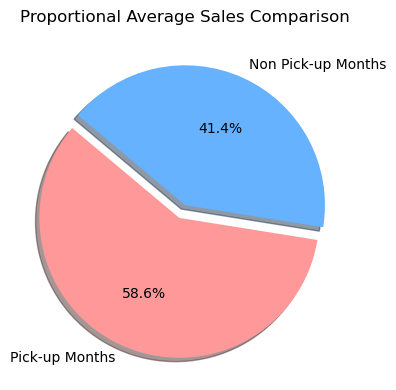

In [23]:
import matplotlib.pyplot as plt

# Data for visualization
categories_ef = ["Pick-up Months", "Non Pick-up Months"]
average_sales_values_ef = [average_sales_pick_up_months_ef, average_sales_non_pick_up_months_ef]

# Create the pie chart for average sales comparison
plt.figure(figsize=(6, 4))  # Adjust the size as needed
plt.pie(average_sales_values_ef, labels=categories_ef, colors=["#FF9999", "#66B2FF"], 
        autopct='%1.1f%%', startangle=140, explode=(0.1, 0), shadow=True)
plt.title("Proportional Average Sales Comparison")
plt.tight_layout()
plt.show()


In [24]:
# Extract sales values
feb_sales_ef = monthly_sales_ef[2]
mar_pick_up_sales_ef = monthly_sales_ef[3]
apr_sales_ef = monthly_sales_ef[4]
may_sales_ef = monthly_sales_ef[5]
jun_pick_up_sales_ef = monthly_sales_ef[6]
jul_sales_ef = monthly_sales_ef[7]
aug_sales_ef = monthly_sales_ef[8]
sep_pick_up_sales_ef = monthly_sales_ef[9]
oct_sales_ef = monthly_sales_ef[10]
nov_sales_ef = monthly_sales_ef[11]
dec_pick_up_sales_ef = monthly_sales_ef[12]
jan_sales_ef = monthly_sales_ef[1]

# Compute averages
mar_avg_ef = (apr_sales_ef + may_sales_ef) / 2
jun_avg_ef = (jul_sales_ef + aug_sales_ef) / 2
sep_avg_ef = (oct_sales_ef + nov_sales_ef) / 2
dec_avg_ef = (jan_sales_ef + feb_sales_ef) / 2

# Construct the output strings
mar_str_ef = f"March: PickUpSales: {mar_pick_up_sales_ef}, Avg of April and May: {mar_avg_ef:.2f} bottles"
jun_str_ef = f"June: PickUpSales: {jun_pick_up_sales_ef}, Avg of July and August: {jun_avg_ef:.2f} bottles"
sep_str_ef = f"September: PickUpSales: {sep_pick_up_sales_ef}, Avg of October and November: {sep_avg_ef:.2f} bottles"
dec_str_ef = f"December: PickUpSales: {dec_pick_up_sales_ef}, Avg of January and February: {dec_avg_ef:.2f} bottles"

print(mar_str_ef)
print(jun_str_ef)
print(sep_str_ef)
print(dec_str_ef)


March: PickUpSales: 1143, Avg of April and May: 1200.00 bottles
June: PickUpSales: 1515, Avg of July and August: 939.50 bottles
September: PickUpSales: 1469, Avg of October and November: 883.00 bottles
December: PickUpSales: 1112, Avg of January and February: 680.50 bottles


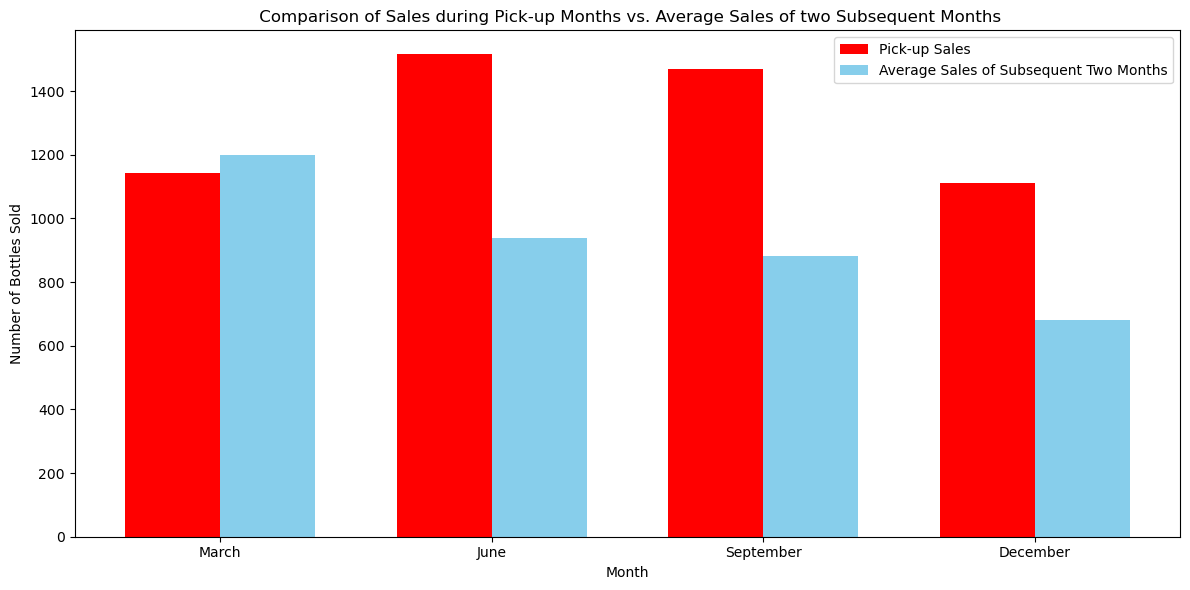

In [25]:
import matplotlib.pyplot as plt

# Data preparation for visualization (Effingham Winery)
months_ef = ['March', 'June', 'September', 'December']
pick_up_sales_ef = [mar_pick_up_sales_ef, jun_pick_up_sales_ef, sep_pick_up_sales_ef, dec_pick_up_sales_ef]
average_sales_ef = [mar_avg_ef, jun_avg_ef, sep_avg_ef, dec_avg_ef]

# Create the grouped bar plot
bar_width = 0.35  # width of the bars
index_ef = range(len(months_ef))  # the label locations

# Plotting
plt.figure(figsize=(12, 6))

# Plot pick-up sales with red color
pick_up_bars_ef = plt.bar(index_ef, pick_up_sales_ef, bar_width, label='Pick-up Sales', color='red')

# Plot average sales of subsequent two months with sky blue color
avg_sales_bars_ef = plt.bar([i + bar_width for i in index_ef], average_sales_ef, bar_width, label='Average Sales of Subsequent Two Months', color='skyblue')

# Labeling and aesthetics
plt.xlabel('Month')
plt.ylabel('Number of Bottles Sold')
plt.title(' Comparison of Sales during Pick-up Months vs. Average Sales of two Subsequent Months')
plt.xticks([i + bar_width / 2 for i in index_ef], months_ef)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
# Group the data by wine and month, then sum the quantities for Effingham
wine_monthly_sales_ef = wine_club_wines_data_ef.groupby(['Line Item', 'Month'])['Quantity'].sum()

# Calculate the average sales for each wine during pick-up and non-pick-up months for Effingham
pick_up_sales_ef = wine_monthly_sales_ef.loc(axis=0)[:, pick_up_months_ef].mean(level=0)
non_pick_up_sales_ef = wine_monthly_sales_ef.loc(axis=0)[:, ~wine_monthly_sales_ef.index.get_level_values('Month').isin(pick_up_months_ef)].mean(level=0)

# Merge the two series into a DataFrame for comparison for Effingham
wine_sales_comparison_ef = pd.DataFrame({
    'PickUp_Months_Avg_Sales': pick_up_sales_ef,
    'Non_PickUp_Months_Avg_Sales': non_pick_up_sales_ef
}).sort_values(by='PickUp_Months_Avg_Sales', ascending=False)

# Format the columns to display the values as "x bottles"
wine_sales_comparison_ef['PickUp_Months_Avg_Sales'] = wine_sales_comparison_ef['PickUp_Months_Avg_Sales'].map(lambda x: f"{x:.2f} bottles")
wine_sales_comparison_ef['Non_PickUp_Months_Avg_Sales'] = wine_sales_comparison_ef['Non_PickUp_Months_Avg_Sales'].map(lambda x: f"{x:.2f} bottles")

print(wine_sales_comparison_ef)


               PickUp_Months_Avg_Sales Non_PickUp_Months_Avg_Sales
Line Item                                                         
Rose                    170.00 bottles              106.62 bottles
Kings Ransom            168.75 bottles              137.25 bottles
Celebration             165.75 bottles              106.75 bottles
Meritage                165.00 bottles              103.88 bottles
Petit manseng           112.50 bottles               80.00 bottles
Chardonnay              106.75 bottles               87.88 bottles
Merlot                   97.25 bottles               67.62 bottles
RESERVE                  89.75 bottles               82.12 bottles
Viognier                 82.50 bottles               51.12 bottles
Petit verdot             57.75 bottles               38.75 bottles
2021 Cab Franc           53.00 bottles               29.00 bottles
SNORT                    49.75 bottles               29.62 bottles
Tannat                   35.00 bottles               59.67 bot

/var/folders/8h/kmz74hwn4150k_wnw4yr2gfr0000gn/T/ipykernel_84431/2428768466.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  pick_up_sales_ef = wine_monthly_sales_ef.loc(axis=0)[:, pick_up_months_ef].mean(level=0)
/var/folders/8h/kmz74hwn4150k_wnw4yr2gfr0000gn/T/ipykernel_84431/2428768466.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  non_pick_up_sales_ef = wine_monthly_sales_ef.loc(axis=0)[:, ~wine_monthly_sales_ef.index.get_level_values('Month').isin(pick_up_months_ef)].mean(level=0)


In [27]:


# Group the data by wine and month, then sum the quantities for Effingham
wine_monthly_sales_ef = wine_club_wines_data_ef.groupby(['Line Item', 'Month'])['Quantity'].sum()

# Define wine club pick up months for Effingham
pick_up_months_ef = [3, 6, 9, 12]

# Function to extract sales data for each wine for specific months for Effingham
def extract_sales_data_ef(wine_name, month):
    try:
        return wine_monthly_sales_ef.loc[wine_name, month]
    except KeyError:
        return 0

# Function to calculate average sales for subsequent two months for Effingham
def average_subsequent_sales_ef(wine_name, month):
    subsequent_months_ef = [(month + 1) % 12 or 12, (month + 2) % 12 or 12]
    sales_values_ef = [extract_sales_data_ef(wine_name, m) for m in subsequent_months_ef]
    return sum(sales_values_ef) / len(sales_values_ef)

# Construct the table for Effingham
table_data_ef = []
for wine in wine_club_wines_data_ef["Line Item"].unique():
    wine_data_ef = [wine]
    for month in pick_up_months_ef:
        wine_data_ef.append(extract_sales_data_ef(wine, month))
        wine_data_ef.append(average_subsequent_sales_ef(wine, month))
    table_data_ef.append(wine_data_ef)

# Create the DataFrame for Effingham
columns_ef = [
    "Wine Name", 
    "Sales in March", "Average Sales in April and May",
    "Sales in June", "Average Sales in July and August",
    "Sales in September", "Average Sales in October and November",
    "Sales in December", "Average Sales in January and February"
]
sales_table_ef = pd.DataFrame(table_data_ef, columns=columns_ef)

# Display the DataFrame for Effingham
print(sales_table_ef)


         Wine Name  Sales in March  Average Sales in April and May  \
0          RESERVE              89                            82.5   
1         Meritage             123                           115.0   
2     Kings Ransom             147                           168.5   
3    Petit manseng              34                           109.0   
4             Rose             142                           155.0   
5           Tannat               0                            31.5   
6     Petit verdot              77                            66.0   
7           Merlot             125                            98.5   
8            SNORT              36                            39.5   
9       Chardonnay              95                           121.0   
10     Celebration             184                           127.0   
11        Viognier              69                            72.5   
12  2021 Cab Franc              22                            14.0   

    Sales in June  